Beata Sirowy
# Apache Kafka: a demo
Based on the IBM Data Engineering Professional Certificate, _ETL and Data Pipelines with Shell, Airflow and Kafka_  <br> Images' copyright: IBM Skills Network 

## Setting up Kafka

1. Download Kafka by running the command below:
    

    __wget https://downloads.apache.org/kafka/3.8.0/kafka_2.13-3.8.0.tgz__


2. Extract Kafka from the zip file by running the command below.

    

    __tar -xzf kafka_2.13-3.8.0.tgz__

This command will create a new directory kafka_2.13-3.8.0 in the current directory.


3. Navigate to the kafka_2.13-3.8.0 directory.

    

    __cd kafka_2.13-3.8.0__


    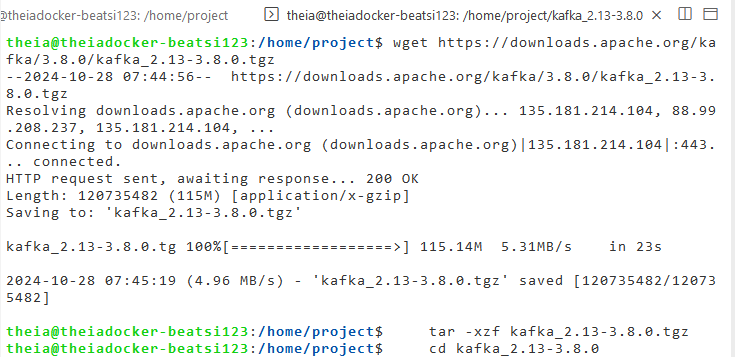


4. Generate a cluster UUID that will uniquely identify the Kafka cluster.

    

    __KAFKA_CLUSTER_ID="$(bin/kafka-storage.sh random-uuid)"__

This cluster id will be used by the KRaft controller.


5. KRaft requires the log directories to be configured. Run the following command to configure the log directories passing the cluster ID.

    

    __bin/kafka-storage.sh format -t $KAFKA_CLUSTER_ID -c config/kraft/server.properties__


6. Now that KRaft is configured, you can start the Kafka server by running the following command.

    

    __bin/kafka-server-start.sh config/kraft/server.properties__
    
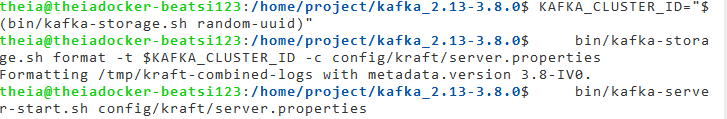

7. You can be sure that the Kafka server has started when the output displays messages like "Kafka Server started".

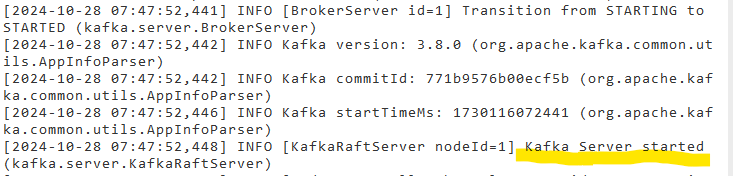

## Creating a topic

1. You need to create a topic before you can start to post messages.

- Start a new terminal and change to the kafka_2.13-3.8.0 directory.


__cd kafka_2.13-3.8.0__


2. To create a topic named news, run the command below.

    

__bin/kafka-topics.sh --create --topic newsABC --bootstrap-server localhost:9092__


3. You will see the message: Created topic news.

- You need a producer to send messages to Kafka. Run the command below to start a producer.


__bin/kafka-console-producer.sh   --bootstrap-server localhost:9092   --topic newsABC__

4. After the producer starts, and you get the '>' prompt, type any text message and press enter. The below text sends three messages to Kafka.

    Good  <br>
    Good day <br>
    Enjoy the Kafka lab <br>

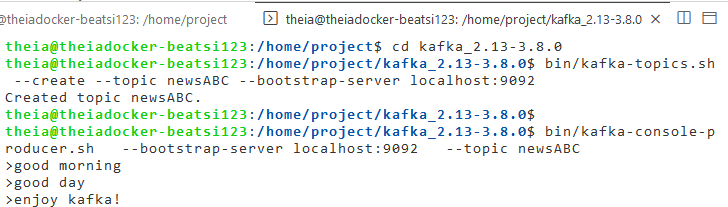

## Starting a consumer

You need a consumer to read messages from Kafka.

1. Start a new terminal and change to the kafka_2.13-3.8.0 directory.


__cd kafka_2.13-3.8.0__

2. Run the command below to listen to the messages in the topic news.

__bin/kafka-console-consumer.sh   --bootstrap-server localhost:9092   --topic newsABC   --from-beginning__

3. You should see all the messages you sent from the producer appear here.

4. You can go back to the producer terminal and type some more messages, one message per line, and you will see them appear here.


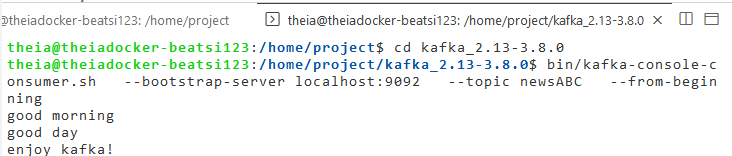

## Explore Kafka directories

Kafka uses the /tmp//tmp/kraft-combined-logs directory to store the messages.

1. Start a new terminal and navigate to the kafka_2.13-3.8.0 directory.

        
__cd kafka_2.13-3.8.0__

2. Explore the root directory of the server.


Notice there is a tmp directory. The kraft-combine-logs inside the tmp directory contains all the logs. To check the logs generated for the topic newsABC run the following command:

__ls /tmp/kraft-combined-logs/newsABC-0__

Note: All messages are stored in the newsABC-0 directory under the /tmp/kraft-combined-logs directory.


### Stopping operations

- To stop the producer

In the terminal where you are running producer, press CTRL+C.

- To stop the consumer

In the terminal where you are running consumer, press CTRL+C.

- To stop the Kafka server

In the terminal where you are running Kafka server, press CTRL+C.